In [7]:
import numpy as np
import pandas as pd
import joblib
from os import listdir
from os.path import isfile, join
from commonFunctions import musicFeatureExtraction

#spremenljivke
from commonFunctions import subfolderName
from commonFunctions import showResults
subfolder = subfolderName

onlyfiles = [f for f in listdir(subfolder) if isfile(join(subfolder, f)) and ".mp3" in f]

allFeatures = []
for fileName in onlyfiles:
    print(fileName)
    data = musicFeatureExtraction(subfolder+str(fileName))
    allFeatures.append([fileName, data])

featuresdf = pd.DataFrame(allFeatures, columns=['id','features'])
featuresdf = featuresdf.set_index(['id'])


005.mp3
019.mp3
084.mp3
179.mp3
192.mp3
299.mp3
379.mp3
564.mp3
573.mp3
683.mp3
755.mp3
789.mp3
815.mp3
825.mp3
926.mp3


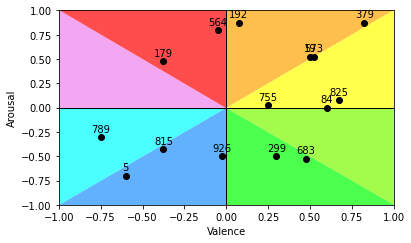

In [36]:
from commonFunctions import parseDEAM
emotions = parseDEAM('./izbrane_15/15_pravilne.csv')
Y_valence = np.array(emotions['valence'].tolist())
Y_arousal = np.array(emotions['arousal'].tolist())

#print(emotions.index.tolist())

displayVAgraph( Y_valence, Y_arousal, emotions.index.tolist(), -1, 1 )

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
MSE: 0.1832 0.2375
MAE: 0.3592 0.416
R2 : 0.1753 0.1885
EVS: 0.2614 0.2293
MXE: 0.7559 0.7646


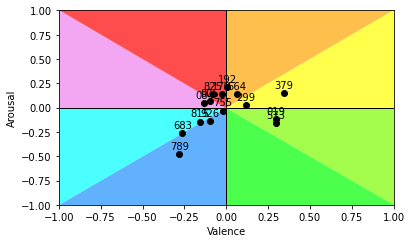

MSE: 0.1912 0.2586
MAE: 0.3799 0.4297
R2 : 0.1393 0.1164
EVS: 0.2689 0.1216
MXE: 0.7828 0.8634


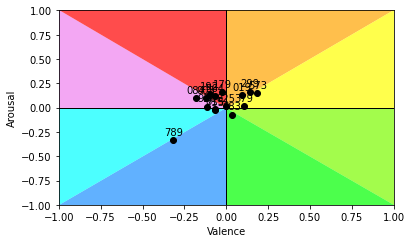

MSE: 0.1877 0.2223
MAE: 0.3675 0.3934
R2 : 0.1551 0.2407
EVS: 0.1838 0.2659
MXE: 0.7399 0.8413


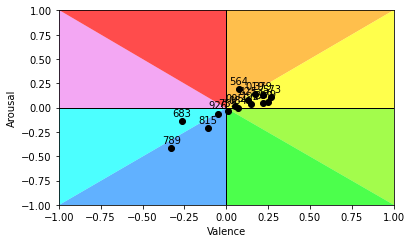

MSE: 0.1827 0.2635
MAE: 0.3713 0.4279
R2 : 0.1774 0.0997
EVS: 0.2424 0.1372
MXE: 0.7262 0.885


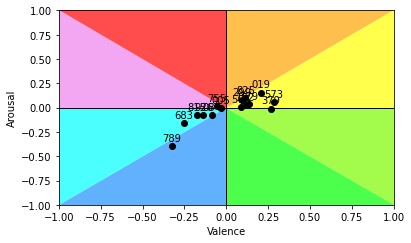

MSE: 0.1746 0.2614
MAE: 0.3642 0.4239
R2 : 0.2138 0.107
EVS: 0.2964 0.1622
MXE: 0.6633 1.02


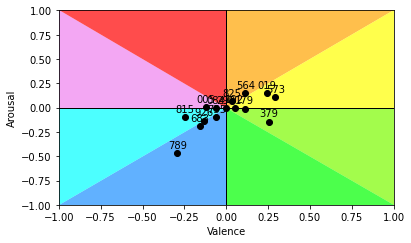

MSE: 0.1759 0.2623
MAE: 0.3557 0.4327
R2 : 0.2082 0.1039
EVS: 0.2397 0.1521
MXE: 0.7031 1.027


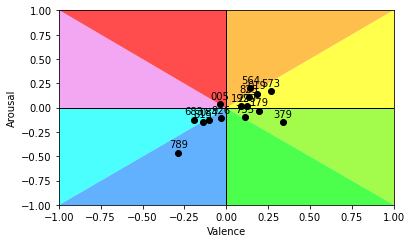

MSE: 0.1809 0.2396
MAE: 0.3768 0.4152
R2 : 0.1856 0.1813
EVS: 0.2338 0.2186
MXE: 0.7056 0.8636


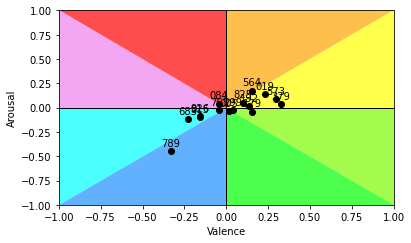

MSE: 0.1828 0.2741
MAE: 0.3787 0.4337
R2 : 0.177 0.0636
EVS: 0.2545 0.1058
MXE: 0.6687 0.9883


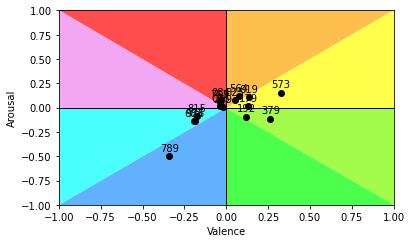

MSE: 0.18 0.2402
MAE: 0.3735 0.4057
R2 : 0.1898 0.1795
EVS: 0.2297 0.2107
MXE: 0.6784 0.9199


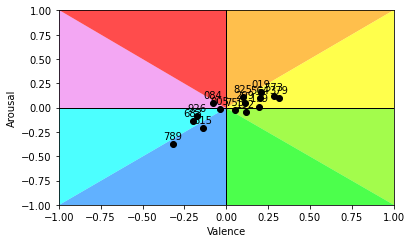

In [59]:
%load_ext autoreload
%autoreload 2
from pickle import load
scaler = load(open('scaler.pkl', 'rb'))

fullType = "FULL"

indexesFeatures = 5
regressionType = "RF"
#regressionType = "SVR"

#selectionType = "corelation"
selectionType = "reliefF"
VA = ['valence', 'arousal']


indexesFeatures = 5
while indexesFeatures < 90:
    for selectVA in VA:
        
        if indexesFeatures != 199:
            selectedFeatIds = pd.read_pickle('Dataset/indexes/'+selectionType+'_'+str(indexesFeatures)+'_'+selectVA+'_indexes.pkl')
            indexes = np.array(selectedFeatIds['indexes'].tolist()) # read indexes file
        
        X_pred = np.array(featuresdf['features'].tolist()) # input
        X_pred = scaler.transform(X_pred)
        
        if indexesFeatures != 199:
            X_pred_filtered = X_pred[:, indexes]# filter features by index
            X_pred = X_pred_filtered
        
        model = joblib.load('./models/'+fullType+'/model'+regressionType+'_'+selectVA+'_'+str(indexesFeatures)+'_'+selectionType+'.joblib')
        predictions = model.predict(X_pred)
        
        if selectVA == 'valence':
            predictions_valence = predictions
            #npValence = np.round(np.array(predictions),4)
            npValence = np.array(predictions)
        else:
            predictions_arousal = predictions
            #npArousal = np.round(np.array(predictions),4)
            npArousal = np.array(predictions)

    # od tukaj dol je samo za prikaz !
    combined = np.vstack((npValence, npArousal)).T
    names = [x.replace('.mp3', '') for x in onlyfiles]
    dataValenceArousal = pd.DataFrame(data=combined, index=names, columns=['valence', 'arousal']) 
    #print(dataValenceArousal.sort_index())

    if showResults:
        from commonFunctions import rezultatiTestData
        rezultatiTestData(predictions_valence, predictions_arousal)

    from commonFunctions import displayVAgraph
    displayVAgraph(predictions_valence, predictions_arousal, names, -1, 1 )
    
    if(indexesFeatures == 5):
        indexesFeatures+=5
    else:
        indexesFeatures+=10

MSE: 0.2445 0.3058
MAE: 0.4316 0.464
R2 : -0.1006 -0.0449
EVS: 0.0778 0.0523
MXE: 0.9106 0.9922


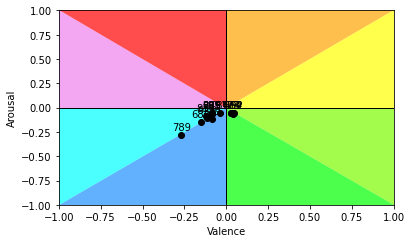

MSE: 0.2577 0.2325
MAE: 0.4425 0.4109
R2 : -0.1602 0.2056
EVS: 0.0581 0.244
MXE: 0.8681 0.8353


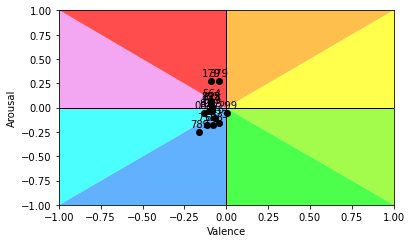

MSE: 0.2211 0.2017
MAE: 0.4168 0.3847
R2 : 0.0049 0.3108
EVS: 0.1413 0.329
MXE: 0.7884 0.7875


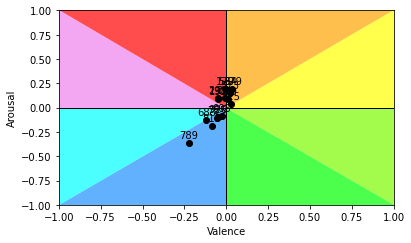

MSE: 0.2148 0.2705
MAE: 0.4085 0.4346
R2 : 0.0333 0.0759
EVS: 0.1553 0.1495
MXE: 0.7071 0.9171


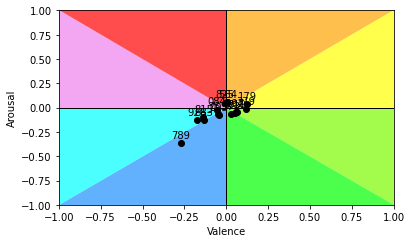

MSE: 0.216 0.2524
MAE: 0.4106 0.4331
R2 : 0.0278 0.1376
EVS: 0.1389 0.2237
MXE: 0.7093 0.9421


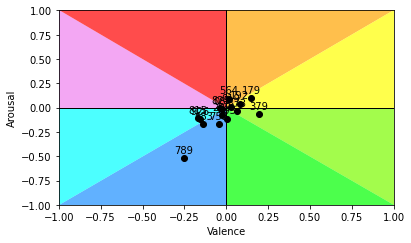

MSE: 0.2267 0.2583
MAE: 0.3976 0.4384
R2 : -0.0205 0.1177
EVS: 0.1742 0.1681
MXE: 0.88 0.8999


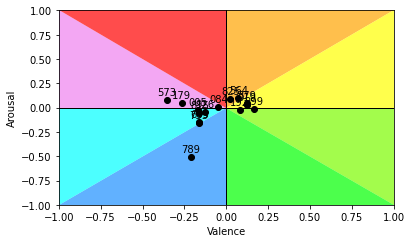

MSE: 0.1845 0.2694
MAE: 0.3621 0.4428
R2 : 0.1697 0.0796
EVS: 0.4231 0.1703
MXE: 0.8453 0.9808


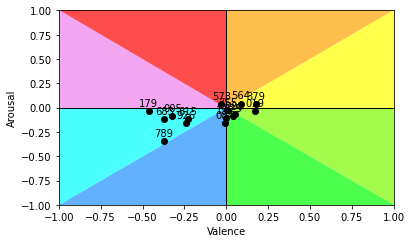

MSE: 0.2231 0.2446
MAE: 0.4212 0.4217
R2 : -0.0044 0.1643
EVS: 0.1353 0.2123
MXE: 0.7214 0.823


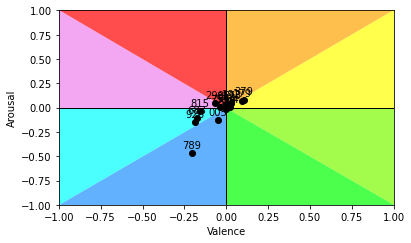

MSE: 0.204 0.2576
MAE: 0.408 0.4275
R2 : 0.0818 0.1198
EVS: 0.2264 0.1808
MXE: 0.6773 0.8811


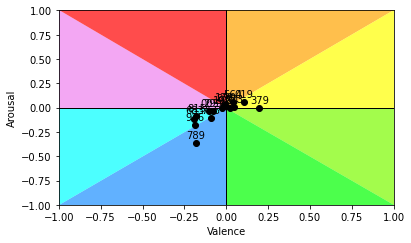

In [60]:
import numpy as np
import pandas as pd
import keras
from pickle import load
scaler = load(open('scaler.pkl', 'rb'))

regressionType = "NN"

#selectionType = "corelation"
selectionType = "reliefF"
VA = ['valence', 'arousal']

indexesFeatures = 5
while indexesFeatures < 90:
    for selectVA in VA:
        
        if indexesFeatures != 199:
            selectedFeatIds = pd.read_pickle('Dataset/indexes/'+selectionType+'_'+str(indexesFeatures)+'_'+selectVA+'_indexes.pkl')
            indexes = np.array(selectedFeatIds['indexes'].tolist()) # read indexes file
        
        X_pred = np.array(featuresdf['features'].tolist()) # input
        X_pred = scaler.transform(X_pred)
        
        if indexesFeatures != 199:
            X_pred_filtered = X_pred[:, indexes]# filter features by index
            X_pred = X_pred_filtered
        
        model = keras.models.load_model('models/NN/model_NN_'+selectionType+'_'+str(indexesFeatures)+'_'+selectVA)
        predictions = model.predict(X_pred)
        
        if selectVA == 'valence':
            predictions_valence = predictions
            #npValence = np.round(np.array(predictions_valence),4)
            npValence = np.array(predictions_valence)
            npValence = npValence[:,0]
        else:
            predictions_arousal = predictions
            #npArousal = np.round(np.array(predictions_arousal),4)
            npArousal = np.array(predictions_arousal)
            npArousal = npArousal[:,0]
            
            
    # od tukaj dol je samo za prikaz !
    combined = np.vstack((npValence, npArousal)).T
    
    names = [x.replace('.mp3', '') for x in onlyfiles]
    dataValenceArousal = pd.DataFrame(data=combined, index=names, columns=['valence', 'arousal']) 
    #print(dataValenceArousal.sort_index())

    if showResults:
        from commonFunctions import rezultatiTestData
        rezultatiTestData(predictions_valence, predictions_arousal)

    from commonFunctions import displayVAgraph
    displayVAgraph(predictions_valence, predictions_arousal, names, -1, 1 )
    
    if(indexesFeatures == 5):
        indexesFeatures+=5
    else:
        indexesFeatures+=10
    


MSE: 0.2592 0.3456
MAE: 0.4446 0.5011
R2 : -0.1668 -0.1807
EVS: 0.0624 -0.0117
MXE: 0.8976 1.0294


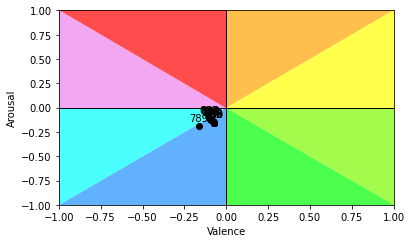

MSE: 0.2272 0.2312
MAE: 0.415 0.3932
R2 : -0.0226 0.21
EVS: 0.0375 0.2446
MXE: 0.7808 0.8749


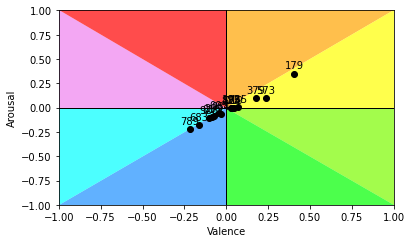

MSE: 0.2339 0.2159
MAE: 0.4304 0.4047
R2 : -0.0529 0.2625
EVS: 0.0887 0.308
MXE: 0.7633 0.7412


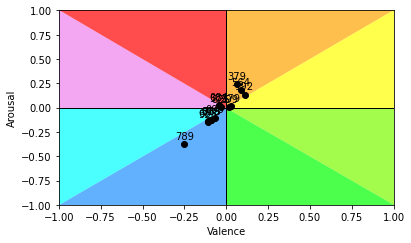

MSE: 0.2349 0.2578
MAE: 0.4229 0.4254
R2 : -0.0573 0.1194
EVS: 0.1034 0.1763
MXE: 0.8012 0.8326


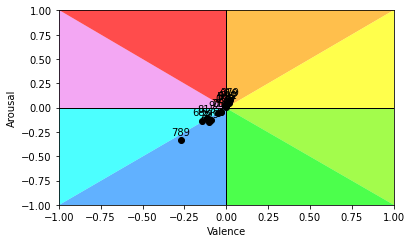

MSE: 0.2145 0.2335
MAE: 0.4097 0.4107
R2 : 0.0344 0.2023
EVS: 0.1386 0.2741
MXE: 0.7326 0.8801


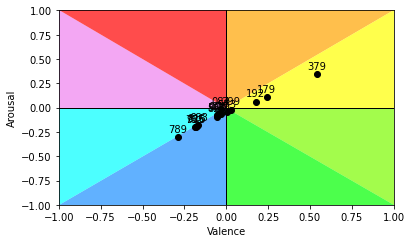

MSE: 0.2226 0.2166
MAE: 0.425 0.3961
R2 : -0.002 0.2599
EVS: 0.1329 0.3153
MXE: 0.6824 0.8121


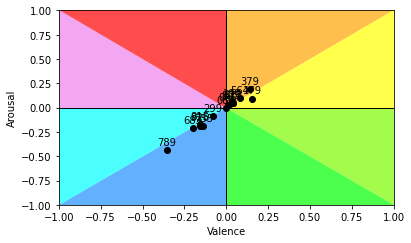

MSE: 0.2194 0.2462
MAE: 0.4167 0.4183
R2 : 0.0126 0.159
EVS: 0.1845 0.2678
MXE: 0.6971 0.8921


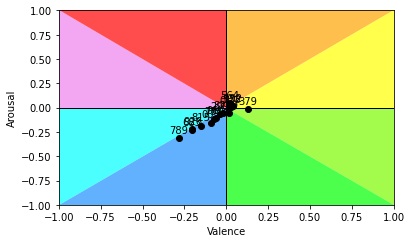

MSE: 0.2045 0.1988
MAE: 0.3964 0.372
R2 : 0.0793 0.3209
EVS: 0.1653 0.3518
MXE: 0.6774 0.7343


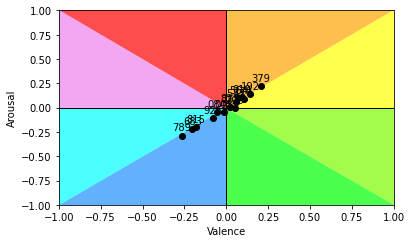

MSE: 0.1967 0.2465
MAE: 0.3895 0.4116
R2 : 0.1145 0.158
EVS: 0.2651 0.2258
MXE: 0.756 0.8762


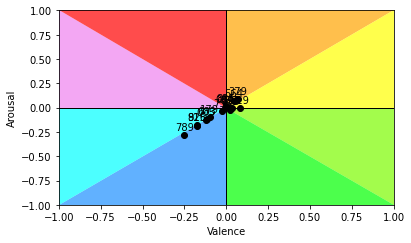

In [36]:
import numpy as np
import pandas as pd
import keras
from pickle import load
scaler = load(open('scaler.pkl', 'rb'))

regressionType = "NNtogether"

#selectionType = "corelation"
selectionType = "reliefF"
VA = ['valence', 'arousal']
selectVA = 'arousal'

#indexesFeatures = 70
indexesFeatures = 5
while indexesFeatures < 90:
    if indexesFeatures != 199:
        selectedFeatIds = pd.read_pickle('Dataset/indexes/'+selectionType+'_'+str(indexesFeatures)+'_'+selectVA+'_indexes.pkl')
        indexes = np.array(selectedFeatIds['indexes'].tolist()) # read indexes file

    X_pred = np.array(featuresdf['features'].tolist()) # input
    X_pred = scaler.transform(X_pred)

    if indexesFeatures != 199:
        X_pred_filtered = X_pred[:, indexes]# filter features by index
        X_pred = X_pred_filtered

    model = keras.models.load_model('models/NNtogether/model_NN_both_'+selectionType+'_'+str(indexesFeatures))
    predictions = model.predict(X_pred)


    # od tukaj dol je samo za prikaz !
    combined = np.vstack((predictions[:,0], predictions[:,1])).T
    names = [x.replace('.mp3', '') for x in onlyfiles]
    dataValenceArousal = pd.DataFrame(data=combined, index=names, columns=['valence', 'arousal']) 
    #print(dataValenceArousal.sort_index())

    if showResults:
        from commonFunctions import rezultatiTestData
        rezultatiTestData(predictions[:,0], predictions[:,1])

    from commonFunctions import displayVAgraph
    displayVAgraph(predictions[:,0], predictions[:,1], names, -1, 1 )
    if(indexesFeatures == 5):
        indexesFeatures+=5
    else:
        indexesFeatures+=10